In [5]:
import pandas as pd

df1 = pd.read_csv("homework_4.1.csv")
df2 = pd.read_csv("homework_4.2.a.csv")
df3 = pd.read_csv("homework_4.2.b.csv")

# Show the first 5 columns for each dataset
print("First 5 columns of homework_4.1.csv:")
display(df1.iloc[:, :5].head())

print("First 5 columns of homework_4.2.a.csv:")
display(df2.iloc[:, :5].head())

print("First 5 columns of homework_4.2.b.csv:")
display(df2.iloc[:, :5].head())

First 5 columns of homework_4.1.csv:


,Unnamed: 0,Z,W,X,Y
0,0,0,-0.155644,-0.496971,0.282484
1,1,1,0.529539,2.284240,4.740596
2,2,1,0.910514,0.872232,3.449569
3,3,1,-0.705476,2.157260,3.002531
4,4,0,-0.590874,-0.386730,-1.848796


First 5 columns of homework_4.2.a.csv:


,Unnamed: 0,X,Y
0,0,81.822339,1
1,1,92.487870,0
2,2,85.372460,0
3,3,78.828025,0
4,4,75.807080,1


First 5 columns of homework_4.2.b.csv:


,Unnamed: 0,X,Y
0,0,81.822339,1
1,1,92.487870,0
2,2,85.372460,0
3,3,78.828025,0
4,4,75.807080,1


In [6]:
# Group by Z to get average Y and X
means_by_z = df1.groupby('Z')[['Y', 'X']].mean()

# Extract means
y1 = means_by_z.loc[1, 'Y']
y0 = means_by_z.loc[0, 'Y']
x1 = means_by_z.loc[1, 'X']
x0 = means_by_z.loc[0, 'X']

# Calculate differences
delta_y = y1 - y0
delta_x = x1 - x0

# Estimate causal effect
effect = delta_y / delta_x

print(f"Effect estimate (E[Y|Z=1] - E[Y|Z=0]) / (E[X|Z=1] - E[X|Z=0]): {effect:.4f}")


Effect estimate (E[Y|Z=1] - E[Y|Z=0]) / (E[X|Z=1] - E[X|Z=0]): 1.5619


In [3]:
!pip install statsmodels



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 49.1 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


Slope before cutoff : 0.00022383079703675583
Slope after cutoff : 0.0001610868648224481


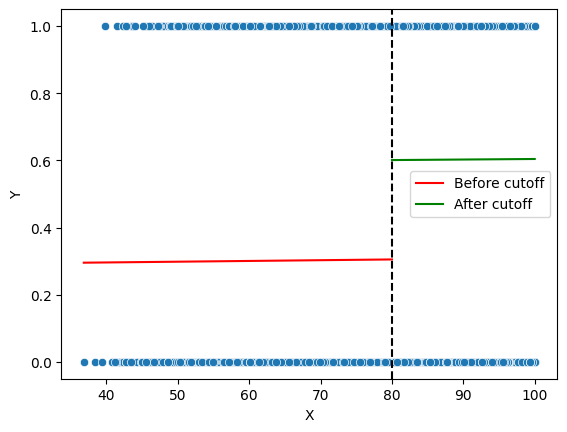

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

cutoff = 80

# Question 3 and 4: Plot regression lines before and after cutoff
def regression_slope(data, cutoff):
    """Perform OLS regression for subset of data."""
    return smf.ols('Y ~ X', data=data).fit()

# Split into two groups
before = df2[df2['X'] < cutoff]
after = df2[df2['X'] >= cutoff]

model_before = regression_slope(before, cutoff)
model_after = regression_slope(after, cutoff)

print("Slope before cutoff :", model_before.params['X'])
print("Slope after cutoff :", model_after.params['X'])

# Plot regression lines
sns.scatterplot(data=df2, x='X', y='Y')
x_vals = np.linspace(before['X'].min(), before['X'].max(), 100)
y_vals = model_before.params['Intercept'] + model_before.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Before cutoff')

x_vals = np.linspace(after['X'].min(), after['X'].max(), 100)
y_vals = model_after.params['Intercept'] + model_after.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='green', label='After cutoff')

plt.axvline(x=cutoff, color='black', linestyle='--')
plt.legend()
plt.show()



In [8]:
# Question 5: Run regression for both datasets to check for non-zero slope
model_df2a = smf.ols('Y ~ X', data=df2).fit()
model_df2b = smf.ols('Y2 ~ X2', data=df3).fit()

print("Slope for Dataset a (X,Y):", model_df2a.params['X'])
print("Slope for Dataset b (X2,Y2):", model_df2b.params['X2'])

print("p-value for a's slope :", model_df2a.pvalues['X'])
print("p-value for b's slope :", model_df2b.pvalues['X2'])


Slope for Dataset a (X,Y): 0.012355753097791824
Slope for Dataset b (X2,Y2): 0.015813580991762825
p-value for a's slope : 0.0
p-value for b's slope : 0.0


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cutoff = 80

# Question 3 and 4
before = df2[df2['X'] < cutoff]
after = df2[df2['X'] >= cutoff]

model_before = LinearRegression()
model_after = LinearRegression()

model_before.fit(before[['X']],
                 before['Y'])

model_after.fit(after[['X']],
                after['Y'])

slope_before = model_before.coef_[0]
slope_after = model_after.coef_[0]

print("Slope before cutoff :", slope_before)
print("Slope after cutoff :", slope_after)

print("Q4. Y is {} before cutoff.".format('increasing' if slope_before > 0 else 'decreasing'))




Slope before cutoff : 0.00022383079703675504
Slope after cutoff : 0.00016108686482244668
Q4. Y is increasing before cutoff.


In [12]:
# Question 5
model_df2a = LinearRegression()
model_df2a.fit(df2[['X']],
               df2['Y'])

model_df2b = LinearRegression()
model_df2b.fit(df3[['X']],
               df3['Y2'])

slope_df2a = model_df2a.coef_[0]
slope_df2b = model_df2b.coef_[0]

print("Slope for Dataset a (X,Y) :", slope_df2a)
print("Slope for Dataset b (X2,Y2) :", slope_df2b)




KeyError: "None of [Index(['X'], dtype='object')] are in the [columns]"